<a href="https://colab.research.google.com/github/moxeeem/flight-satisfaction/blob/main/AirflightSatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Разведочный анализ данных и предсказательная модель**

## Импорт библиотек, константы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import confusion_matrix

In [2]:
RANDOM_STATE = 42

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv"

## Загрузка и обзор данных

### Загрузка

In [4]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

Датасет содержит информацию о клиентах некоторой авиакомпании.

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (satisfied или neutral or dissatisfied)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)

Признаки, перечисленные ниже, являются числовыми. По смыслу они категориальные: клиент ставил оценку от 1-го до 5-ти включительно. Есть выбросы!

- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [5]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [6]:
# случайные три записи из датасета
df.sample(3)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
20163,20164,Female,22.0,Loyal Customer,Business travel,Business,2577.0,15.0,66.0,3.0,...,3.0,3.0,3.0,1.0,1.0,3.0,2.0,2.0,3.0,neutral or dissatisfied
73527,73528,Male,42.0,Loyal Customer,Business travel,Business,1887.0,0.0,0.0,3.0,...,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,satisfied
92821,92822,Male,30.0,disloyal Customer,Business travel,Eco,1541.0,167.0,156.0,4.0,...,3.0,5.0,2.0,2.0,4.0,3.0,5.0,4.0,5.0,neutral or dissatisfied


In [7]:
# избавляемся от столбца id, так как он не несет никакой ценности
df = df.drop('id', axis=1)

In [8]:
df.sample(3)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
21551,Female,23.0,Loyal Customer,Personal Travel,Eco,164.0,0.0,0.0,2.0,2.0,...,0.0,4.0,4.0,1.0,2.0,4.0,2.0,4.0,4.0,-
114772,Female,46.0,Loyal Customer,Business travel,Business,2071.0,39.0,38.0,4.0,4.0,...,4.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,satisfied
73044,Male,57.0,Loyal Customer,Personal Travel,Eco,1096.0,0.0,0.0,3.0,4.0,...,3.0,3.0,3.0,2.0,2.0,3.0,4.0,3.0,3.0,neutral or dissatisfied


## Исследование данных

Размер датасета

In [9]:
df.shape

(129880, 23)

Информация о типах данных и пропусках

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129549 non-null  object 
 1   Age                                129564 non-null  float64
 2   Customer Type                      129803 non-null  object 
 3   Type of Travel                     129779 non-null  object 
 4   Class                              129764 non-null  object 
 5   Flight Distance                    129786 non-null  float64
 6   Departure Delay in Minutes         129773 non-null  float64
 7   Arrival Delay in Minutes           129371 non-null  float64
 8   Inflight wifi service              129835 non-null  float64
 9   Departure/Arrival time convenient  129831 non-null  float64
 10  Ease of Online booking             129837 non-null  float64
 11  Gate location                      1298

Обращаем внимание, что во всех признаках имеются пропуски

Основные числовые характеристики

In [11]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


Ошибки, которые удалось выявить на этом этапе:

*   Пропуски в данных
*   В датасете имеются люди, возраст которых не может соответствовать реальности. Имеются слишком маленькие (вряд ли младенец, которому 0 лет, сможет правильно оценить свой полет на самолете) и слишком живучие (старше 115 лет) люди.
*   Максимальная дальность полета - 379620 миль, это невозможное расстояние для самолета, которое превышает любые известные рекорды.
*   В датасете имеются данные об оценках 0 и 45. Это невозможно, так как система оценивания от 1 до 5.



In [12]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129549,129803,129779,129764,129880
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65726,106040,89625,62103,58879


Обращаем внимание, что признак satisfaction может принимать три уникальных значения, а не два.

Рассмотрим распределение целевой переменной

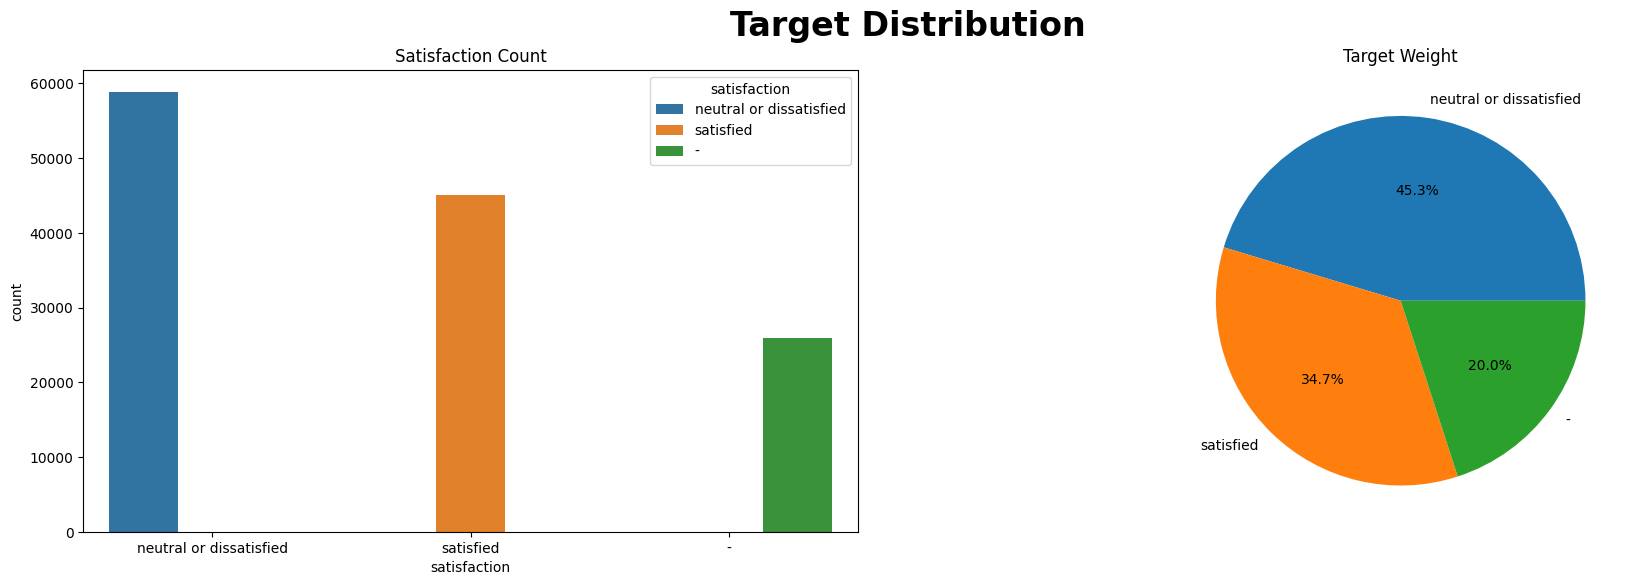

In [13]:
fig = plt.figure(figsize = (22,6))
plt.suptitle('Target Distribution', weight = 'bold', fontsize = 24, fontname = 'moonspace')
grid = gridspec.GridSpec(nrows = 1, ncols = 2, figure = fig)
ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Satisfaction Count')
sns.countplot(x='satisfaction', data = df, ax = ax1, hue = 'satisfaction')

ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Target Weight')
label = list(df['satisfaction'].value_counts().index)
value = list(df['satisfaction'].value_counts().values)

ax2.pie(value, labels=label, autopct='%1.1f%%')
plt.show()

## Анализ

Исправим неточности, которые удалось найти во время исследования данных.

*   Пропуски в данных
*   В датасете имеются люди, возраст которых не может соответствовать реальности. Имеются слишком маленькие (вряд ли младенец, которому 0 лет, сможет правильно оценить свой полет на самолете) и слишком живучие (старше 115 лет) люди.
*   Максимальная дальность полета - 379620 миль, это невозможное расстояние для самолета, которое превышает любые известные рекорды.
*   В датасете имеются данные об оценках 0 и 45. Это невозможно, так как система оценивания от 1 до 5.
*   В датасете три уникальных значения для целевой переменной

Избавимся от неправильных оценок

In [14]:
df = df.drop(df[df['satisfaction'] == "-"].index)

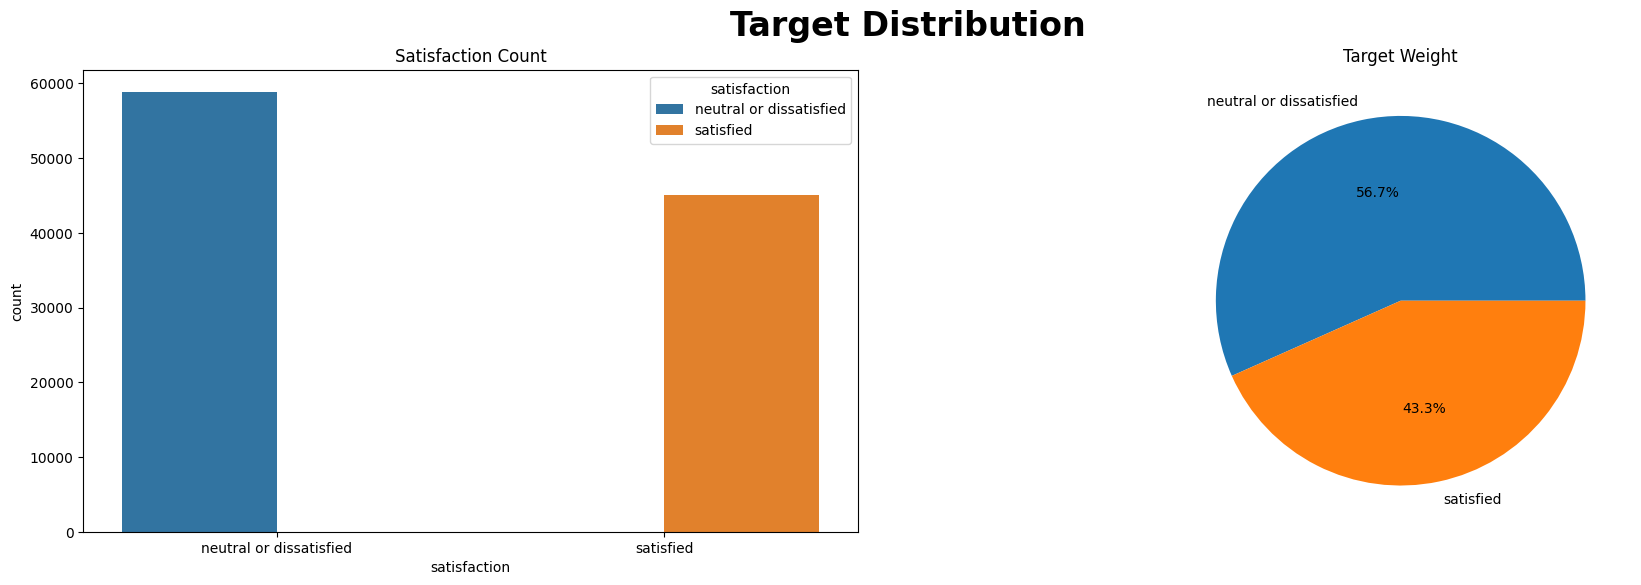

In [15]:
fig = plt.figure(figsize = (22,6))
plt.suptitle('Target Distribution', weight = 'bold', fontsize = 24, fontname = 'moonspace')
grid = gridspec.GridSpec(nrows = 1, ncols = 2, figure = fig)
ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Satisfaction Count')
sns.countplot(x='satisfaction', data = df, ax = ax1, hue = 'satisfaction')

ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Target Weight')
label = list(df['satisfaction'].value_counts().index)
value = list(df['satisfaction'].value_counts().values)

ax2.pie(value, labels=label, autopct='%1.1f%%')
plt.show()

Также графики показывают, что данные хорошо сбалансированы

Проанализируем зависимость удовлетворенности пассажира от пола, лояльности компании, класса обслуживания, возраста

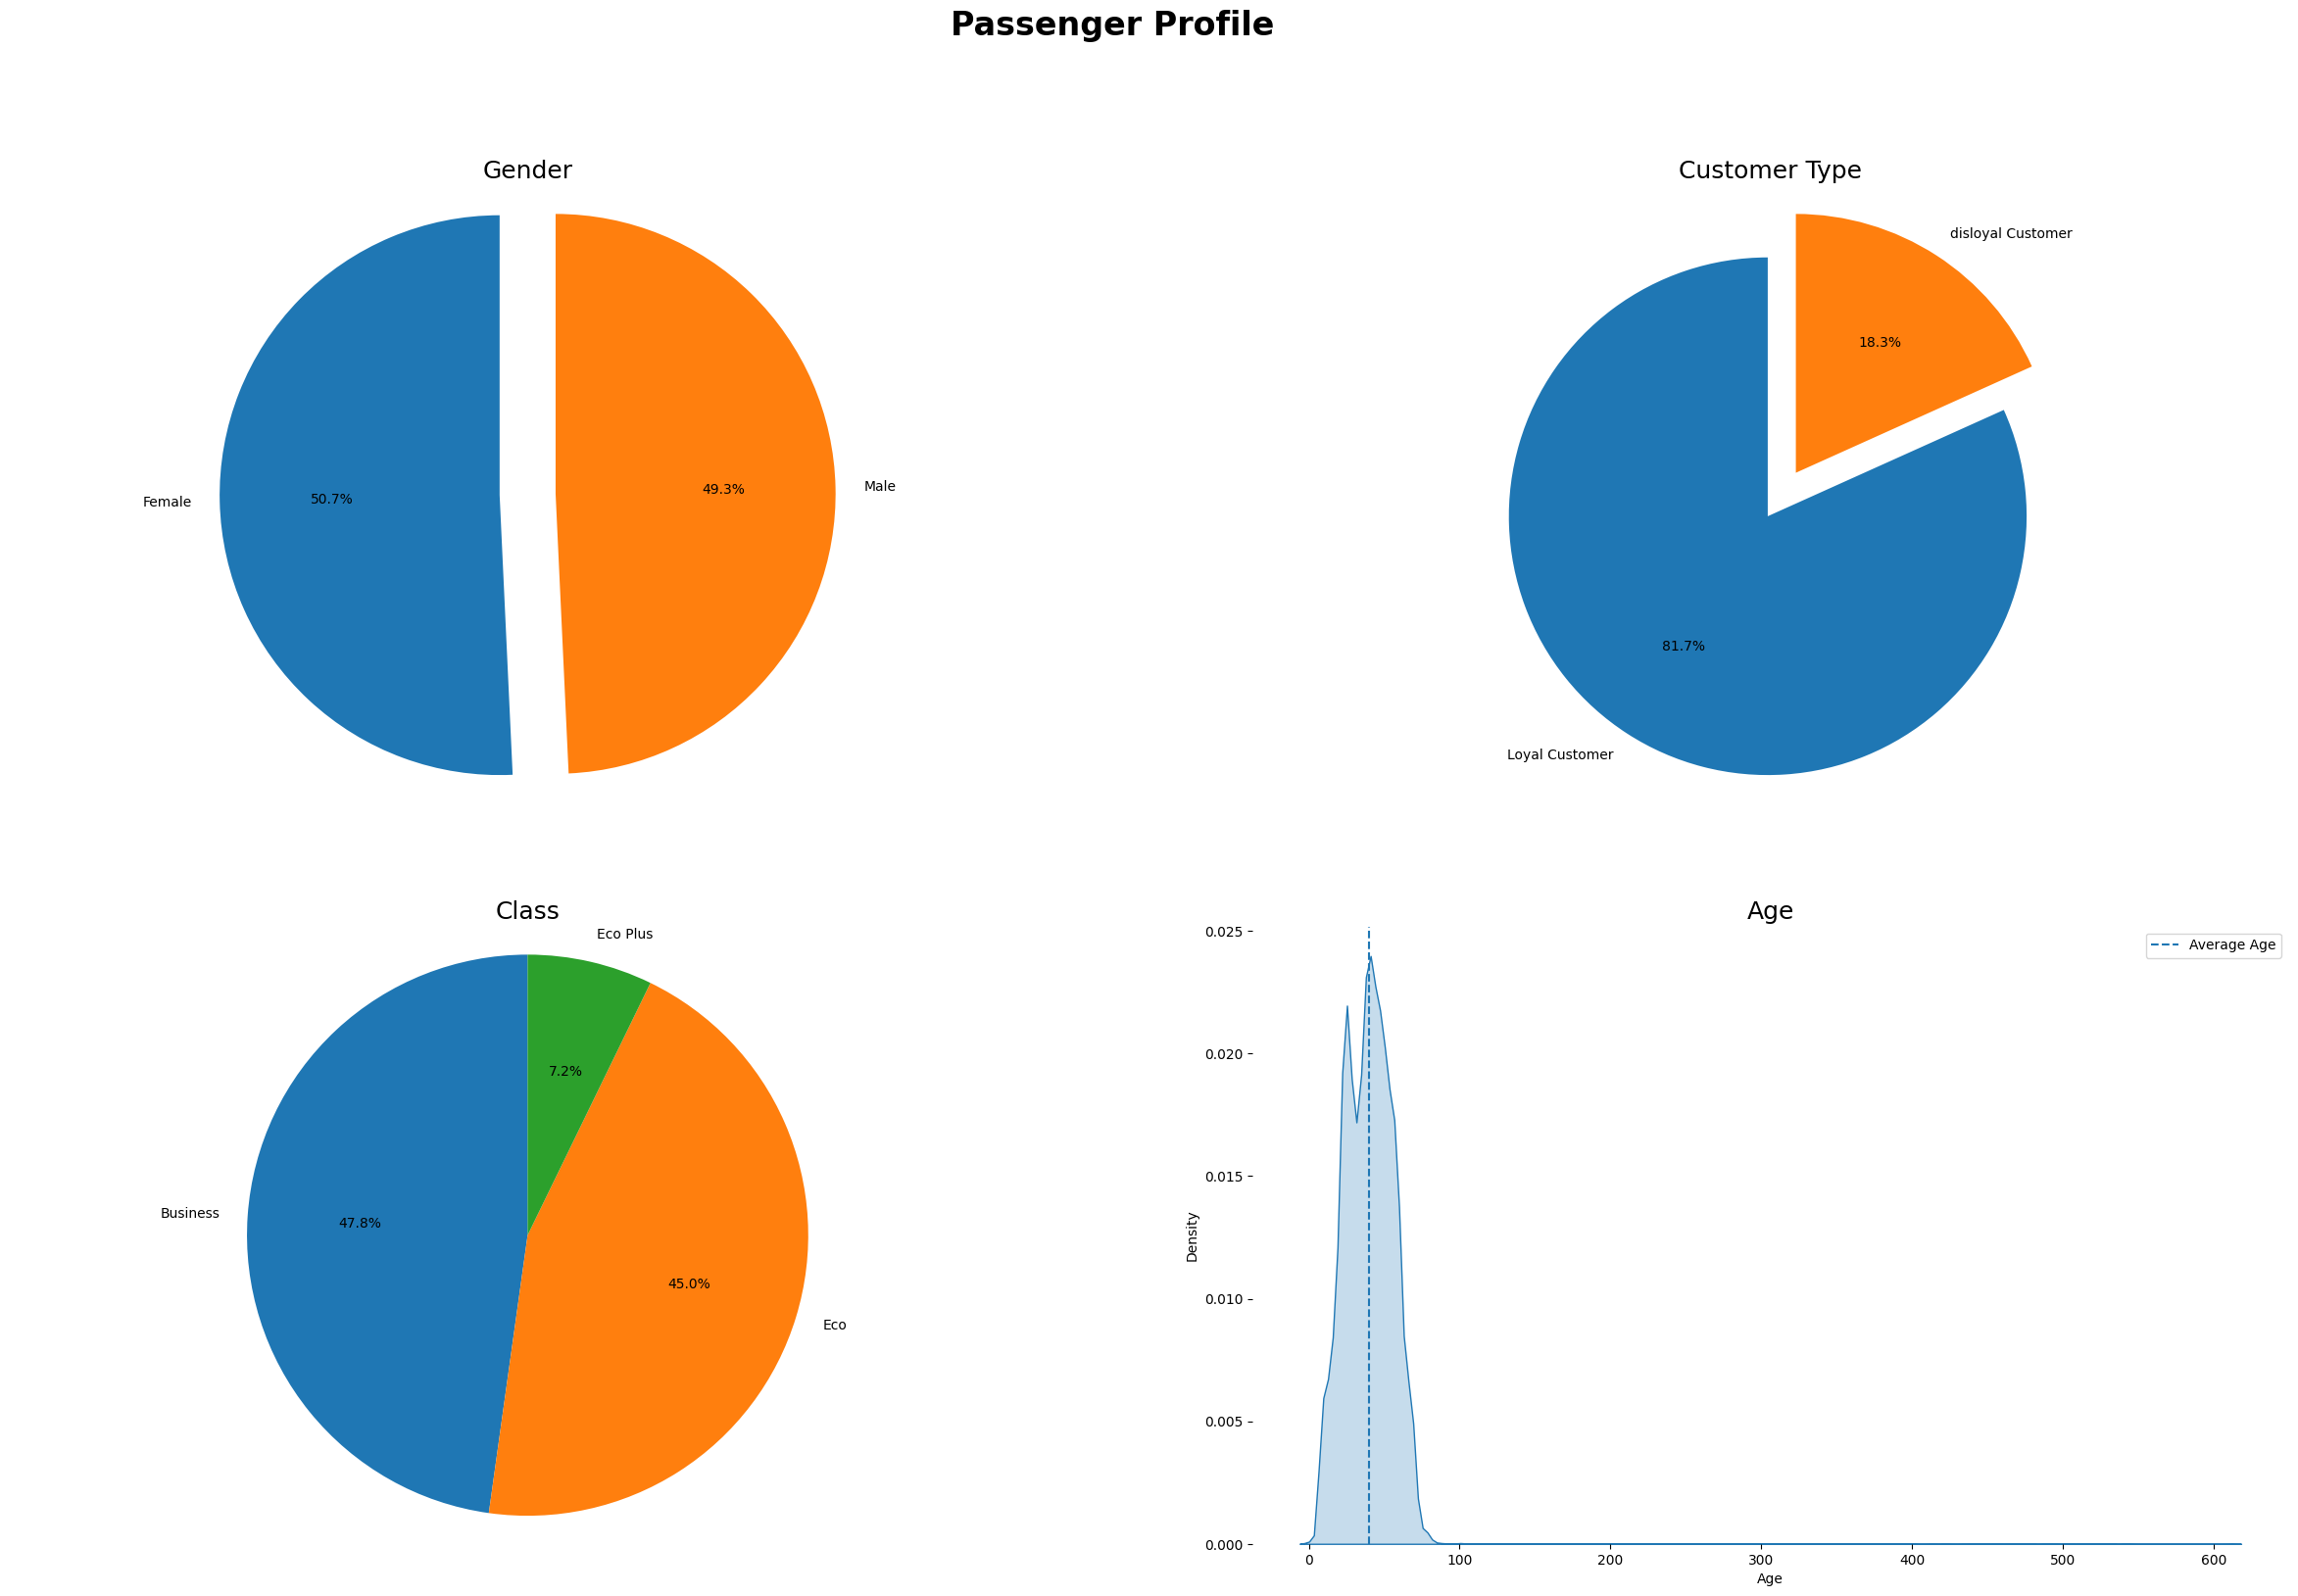

In [16]:
fig = plt.figure(figsize=(30,18))
plt.suptitle('Passenger Profile', weight='bold', fontsize=24, fontname='moonspace')
grid = gridspec.GridSpec(nrows = 2, ncols = 2, figure = fig)

ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Gender', fontsize = 18)

label = list(df['Gender'].value_counts().index)
value = list(df['Gender'].value_counts().values)

ax1.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.2), startangle = 90)
ax1.axis('equal')

ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Customer Type', fontsize = 18)

label = list(df['Customer Type'].value_counts().index)
value = list(df['Customer Type'].value_counts().values)

ax2.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.2), startangle = 90)
ax2.axis('equal')

ax3 = fig.add_subplot(grid[1,0:1])
ax3.set_title('Class', fontsize = 18)

label = list(df['Class'].value_counts().index)
value = list(df['Class'].value_counts().values)

ax3.pie(value, labels=label, autopct='%1.1f%%', startangle = 90)
ax3.axis('equal')

ax4 = fig.add_subplot(grid[1,1:])
ax4.set_title('Age', fontsize = 18)

sns.kdeplot(df['Age'],ax=ax4,fill=True)

for spine in ax4.spines.values():
  spine.set_visible(False)

ax4.axvline(df['Age'].mean(),linestyle='--', label = 'Average Age')
ax4.legend()

Решим проблему со слишком старыми людьми и младенцами. Будем считать, что участвовать в опросе об удовлетворенности полетом могут люди в возрасте от 3 до 115 лет (самый живучий человек в мире - Мария Морера, ей 115 лет).

In [17]:
df_old = df[(df['Age'] > 115) | (df['Age'] < 4)]

In [18]:
#посмотрим, сколько людей с неправильным возрастом в датасете
df_old.shape

(344, 23)

In [19]:
(df_old['Age'].count() / df['Age'].count()) * 100

0.3319085707669597

0.3% пассажиров указали свой неправильный возраст. Это достаточно мало, поэтому просто удалим их из датасета

In [20]:
df = df.drop(df_old.index)

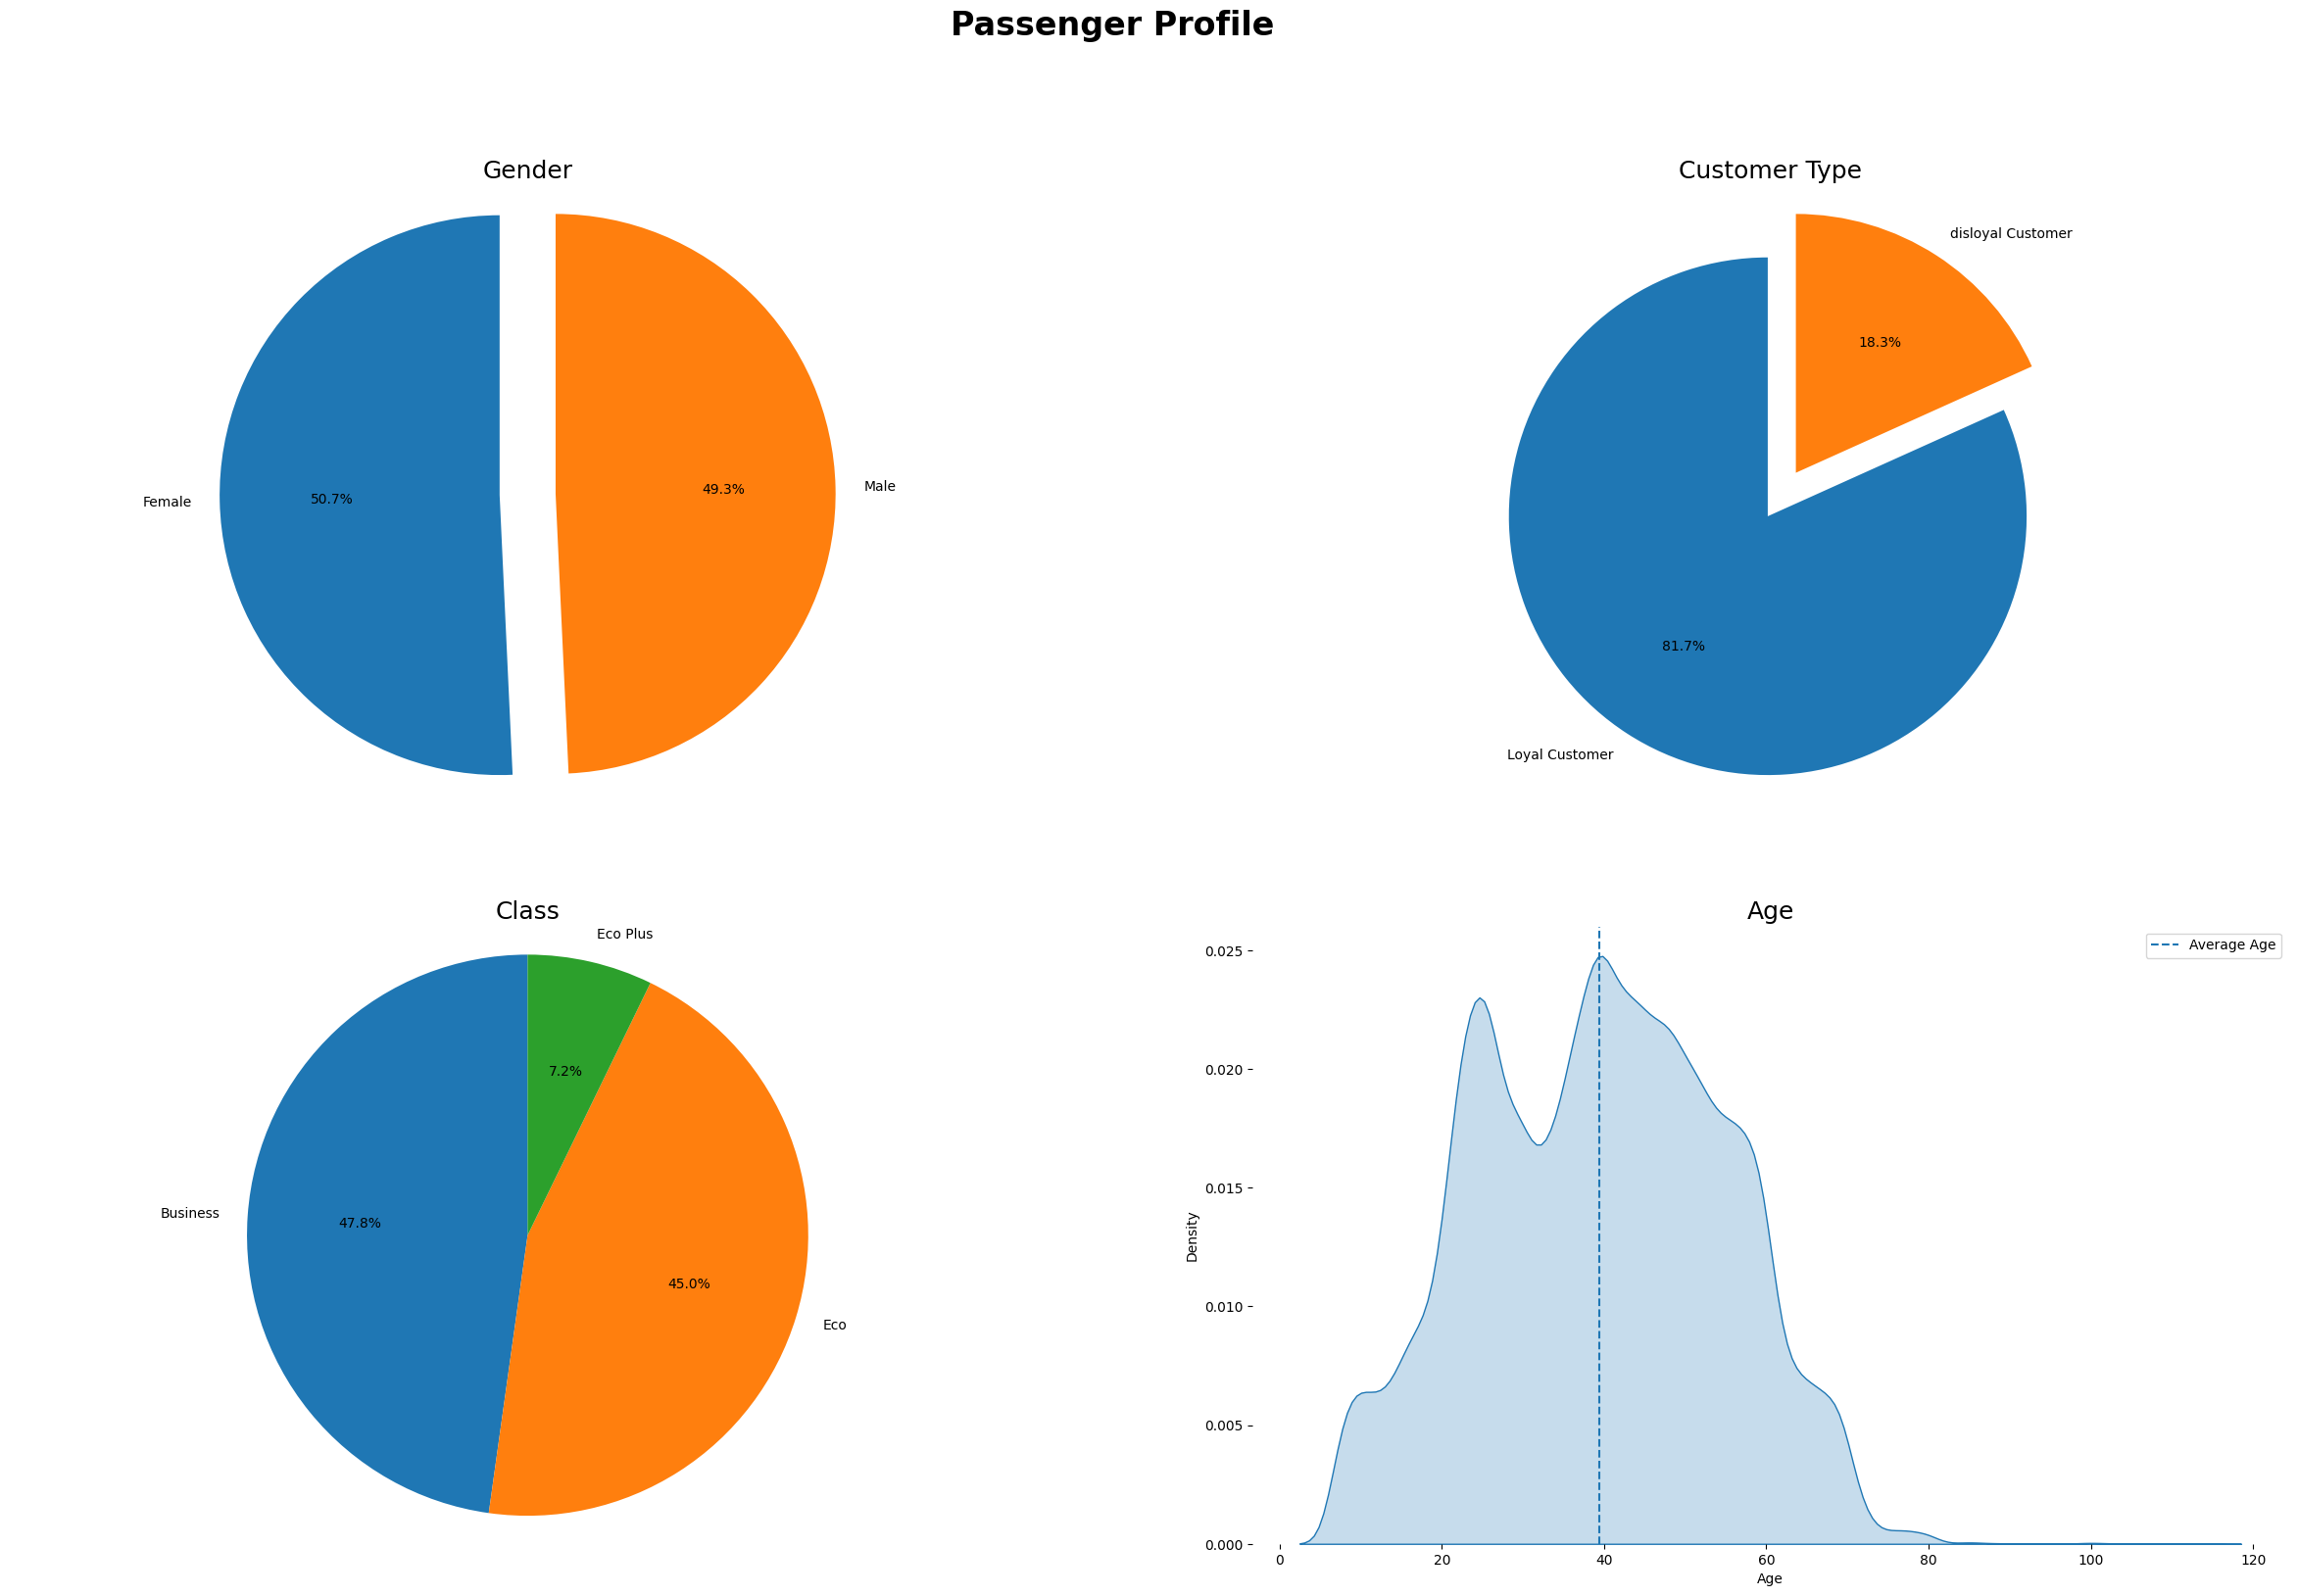

In [21]:
fig = plt.figure(figsize=(30,18))
plt.suptitle('Passenger Profile', weight='bold', fontsize=24, fontname='moonspace')
grid = gridspec.GridSpec(nrows = 2, ncols = 2, figure = fig)

ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Gender', fontsize = 18)

label = list(df['Gender'].value_counts().index)
value = list(df['Gender'].value_counts().values)

ax1.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.2), startangle = 90)
ax1.axis('equal')

ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Customer Type', fontsize = 18)

label = list(df['Customer Type'].value_counts().index)
value = list(df['Customer Type'].value_counts().values)

ax2.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.2), startangle = 90)
ax2.axis('equal')

ax3 = fig.add_subplot(grid[1,0:1])
ax3.set_title('Class', fontsize = 18)

label = list(df['Class'].value_counts().index)
value = list(df['Class'].value_counts().values)

ax3.pie(value, labels=label, autopct='%1.1f%%', startangle = 90)
ax3.axis('equal')

ax4 = fig.add_subplot(grid[1,1:])
ax4.set_title('Age', fontsize = 18)

sns.kdeplot(df['Age'],ax=ax4,fill=True)

for spine in ax4.spines.values():
  spine.set_visible(False)

ax4.axvline(df['Age'].mean(),linestyle='--', label = 'Average Age')
ax4.legend()

Визуализируем степень удовлетворенности клиентов

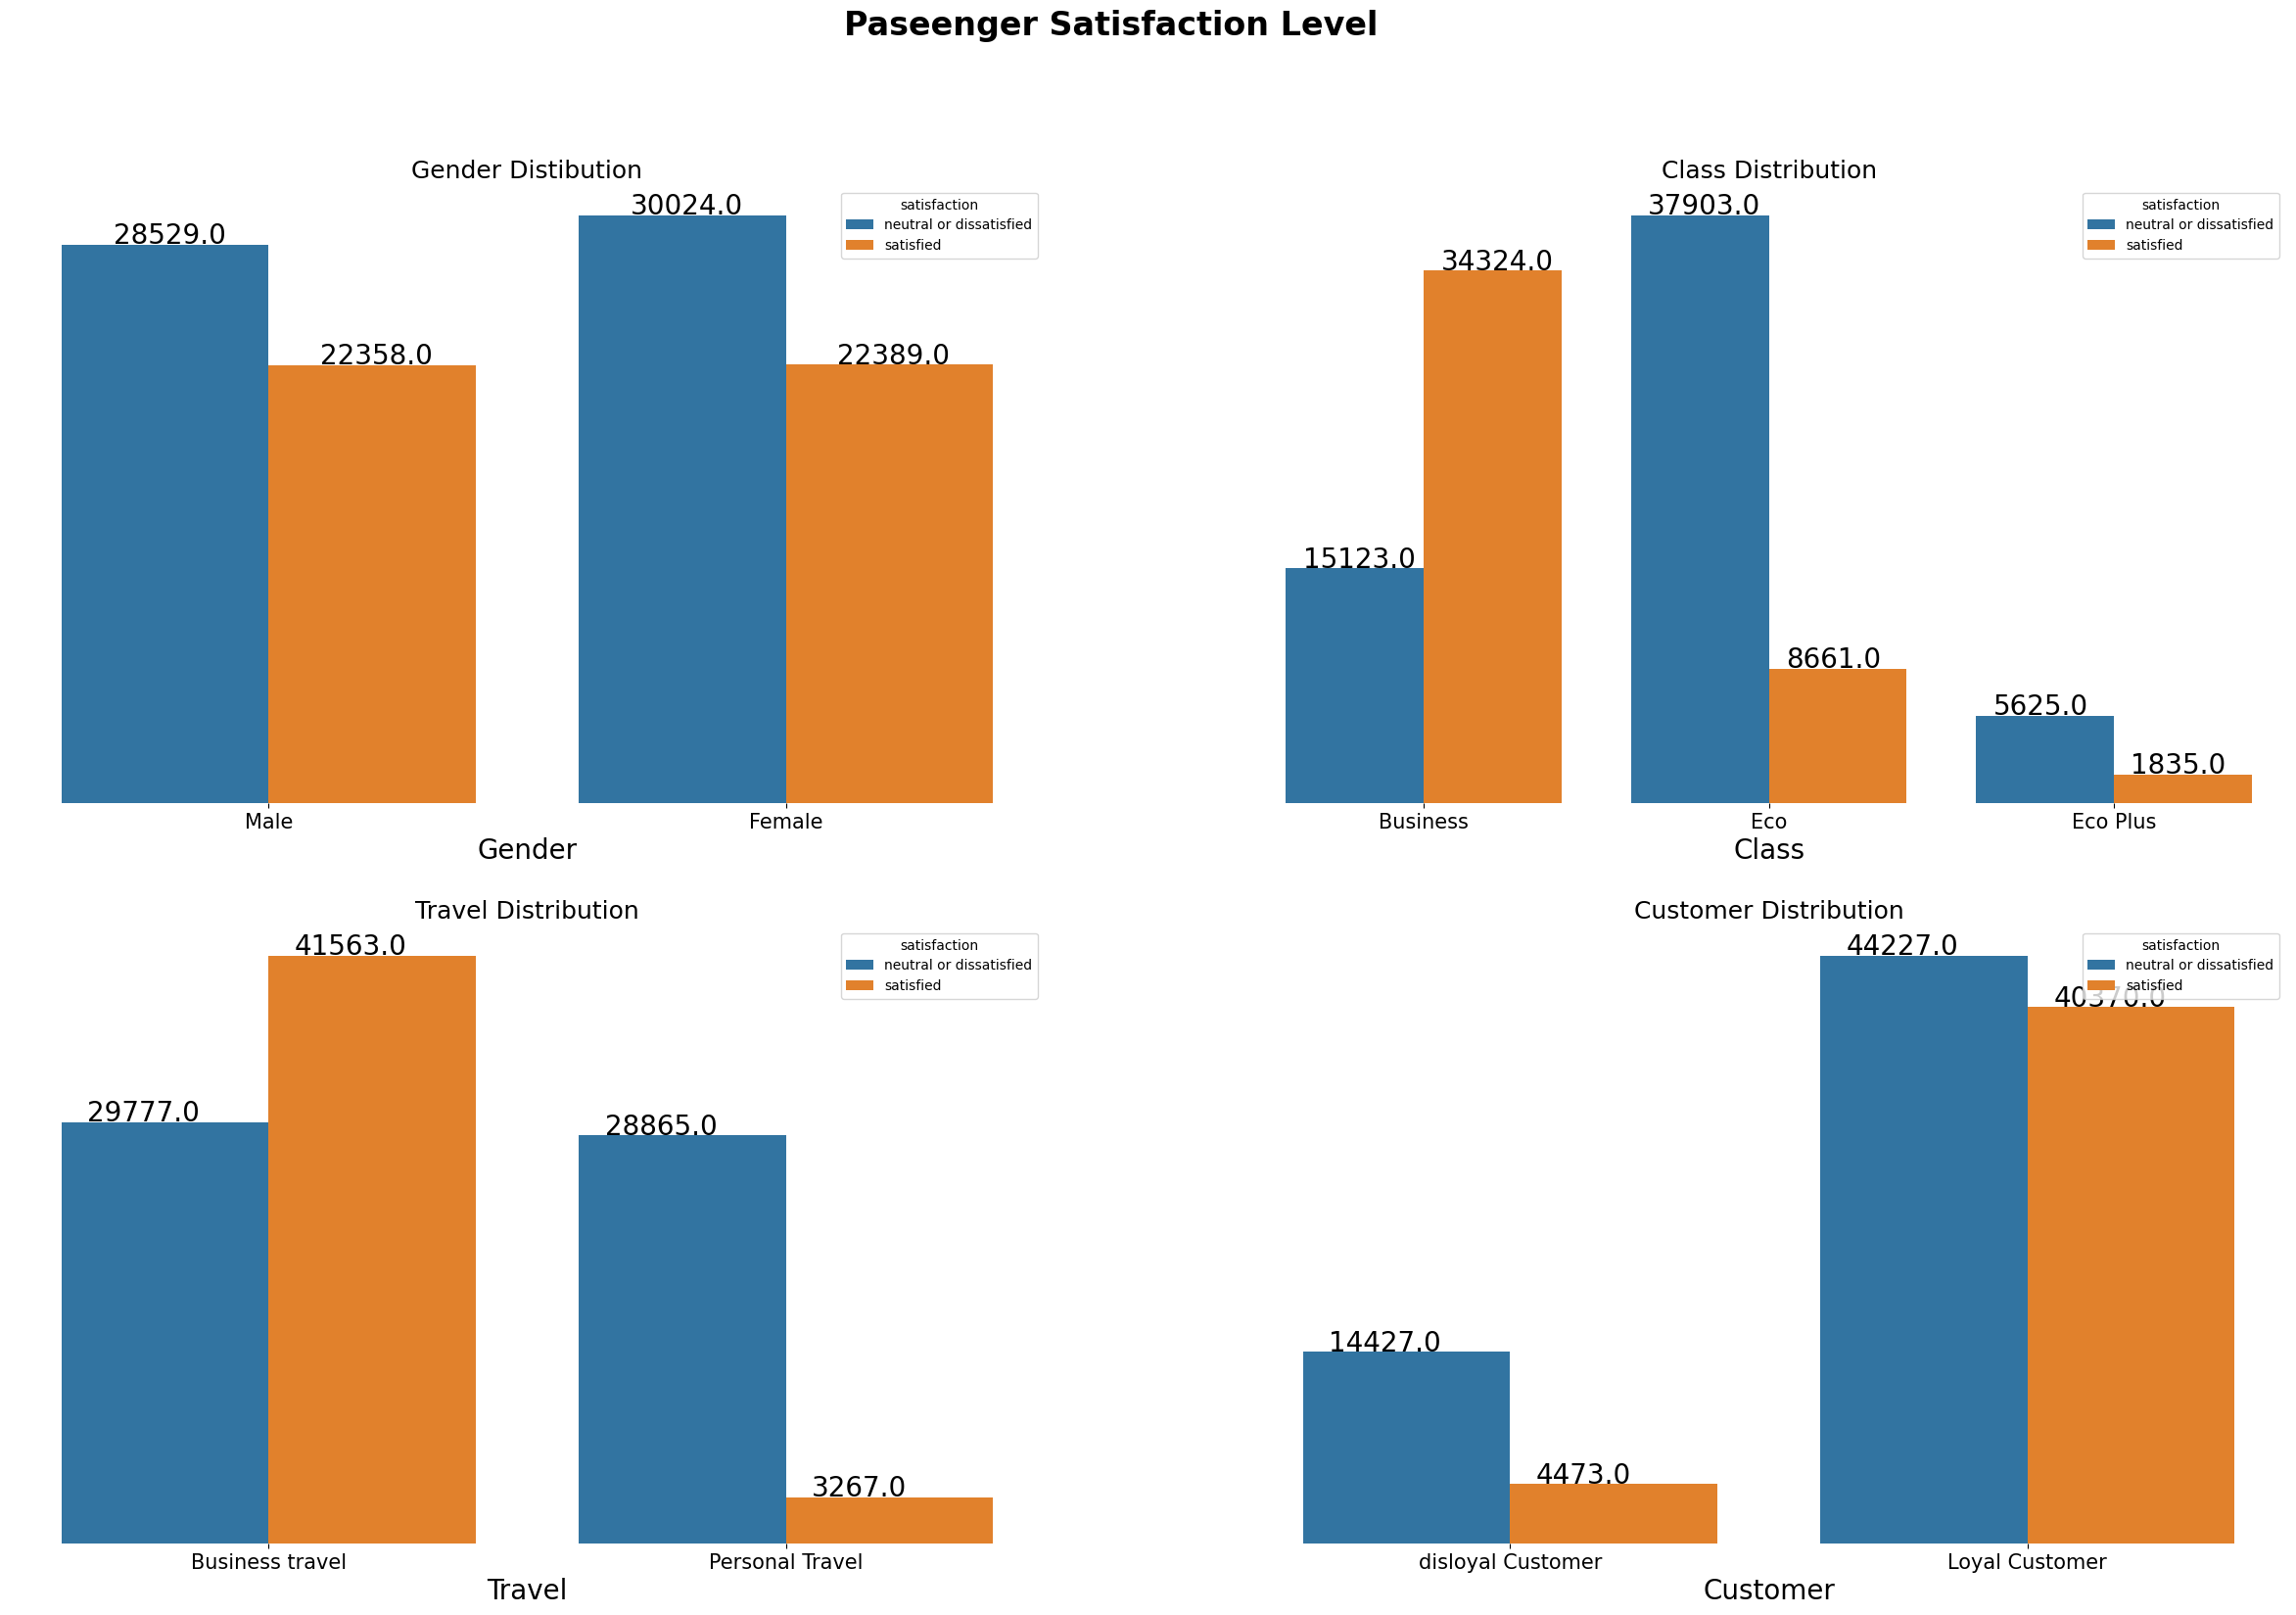

In [22]:
fig=plt.figure(figsize=(30,18))
plt.suptitle('Paseenger Satisfaction Level', weight='bold', fontsize=24,fontname='moonspace')
grid = gridspec.GridSpec(nrows=2,ncols=2,figure=fig)

ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Gender Distibution', fontsize=18)

sns.countplot(x=df['Gender'], hue = df['satisfaction'], ax = ax1)

for p in ax1.patches:
  ax1.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50),fontsize=20)

ax1.get_yaxis().set_visible(False)
for spine in ax1.spines.values():
  spine.set_visible(False)

ax1.tick_params(axis='x',labelsize=15)
ax1.set_xlabel('Gender', fontsize=20)

ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Class Distribution', fontsize=18)

sns.countplot(x=df['Class'], hue = df['satisfaction'],ax=ax2)

for p in ax2.patches:
  ax2.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.05, p.get_height()+50), fontsize = 20)

ax2.get_yaxis().set_visible(False)
for spine in ax2.spines.values():
  spine.set_visible(False)
ax2.tick_params(axis='x',labelsize=15)
ax2.set_xlabel('Class', fontsize=20)

ax3 = fig.add_subplot(grid[1,:1])
ax3.set_title('Travel Distribution', fontsize = 18)

sns.countplot(x=df['Type of Travel'], hue = df['satisfaction'], ax=ax3)

for p in ax3.patches:
  ax3.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.05, p.get_height()+50), fontsize=20)

ax3.get_yaxis().set_visible(False)
for spine in ax3.spines.values():
  spine.set_visible(False)

ax3.tick_params(axis='x',labelsize=15)
ax3.set_xlabel('Travel',fontsize = 20)

ax4 = fig.add_subplot(grid[1,1:])
ax4.set_title('Customer Distribution', fontsize=18)

sns.countplot(x=df['Customer Type'], hue=df['satisfaction'],ax=ax4)

for p in ax4.patches:
  ax4.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.05,p.get_height()+50), fontsize=20)

ax4.get_yaxis().set_visible(False)
for spine in ax4.spines.values():
  spine.set_visible(False)
ax4.tick_params(axis='x', labelsize=15)
ax4.set_xlabel('Customer', fontsize=20)

plt.show()

Решим проблему с оценками

In [23]:
cols_to_check = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
mask = (df[cols_to_check] >= 1) & (df[cols_to_check] <= 5)

df = df.loc[mask.all(axis=1)]

In [24]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,94277.000000,94448.000000,94440.000000,94145.000000,94515.000000,94515.000000,94515.000000,94515.000000,94515.000000,94515.000000,94515.000000,94515.000000,94515.000000,94515.000000,94515.000000,94515.000000,94515.000000,94515.000000
mean,39.849274,1357.372099,16.046876,17.096075,2.817595,3.207036,2.877533,2.985653,3.212019,3.326170,3.454415,3.381410,3.384415,3.379665,3.636269,3.290896,3.644448,3.293964
std,15.103054,4613.123773,76.267663,113.757102,1.252432,1.385907,1.296703,1.281036,1.323902,1.263029,1.311448,1.325752,1.286638,1.295293,1.169401,1.265846,1.164854,1.308833
min,7.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,28.000000,440.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000
50%,40.000000,867.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,51.000000,1781.000000,13.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,114.000000,379620.000000,11011.000000,14006.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Очистим датасет от пропусков

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94515 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             94279 non-null  object 
 1   Age                                94277 non-null  float64
 2   Customer Type                      94457 non-null  object 
 3   Type of Travel                     94436 non-null  object 
 4   Class                              94432 non-null  object 
 5   Flight Distance                    94448 non-null  float64
 6   Departure Delay in Minutes         94440 non-null  float64
 7   Arrival Delay in Minutes           94145 non-null  float64
 8   Inflight wifi service              94515 non-null  float64
 9   Departure/Arrival time convenient  94515 non-null  float64
 10  Ease of Online booking             94515 non-null  float64
 11  Gate location                      94515 non-null  fl

In [26]:
df = df.dropna()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93314 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             93314 non-null  object 
 1   Age                                93314 non-null  float64
 2   Customer Type                      93314 non-null  object 
 3   Type of Travel                     93314 non-null  object 
 4   Class                              93314 non-null  object 
 5   Flight Distance                    93314 non-null  float64
 6   Departure Delay in Minutes         93314 non-null  float64
 7   Arrival Delay in Minutes           93314 non-null  float64
 8   Inflight wifi service              93314 non-null  float64
 9   Departure/Arrival time convenient  93314 non-null  float64
 10  Ease of Online booking             93314 non-null  float64
 11  Gate location                      93314 non-null  fl

In [28]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,93314,93314,93314,93314,93314
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,47282,78316,64445,45282,53593


Решим проблему с дальностью полета

In [29]:
df_wrong = df[(df['Flight Distance'] > 379620) | (df['Flight Distance'] < 0)]
df = df.drop(df_wrong.index)

##Отбор признаков

Удалим признаки, которые не способствуют различению целевых классов. При этом постараемся сохранить признаки оценок. Для этого рассмотрим все гистограммы, корреляционную карту.

**Гистограммы**

<ipython-input-30-3c74d942a378>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


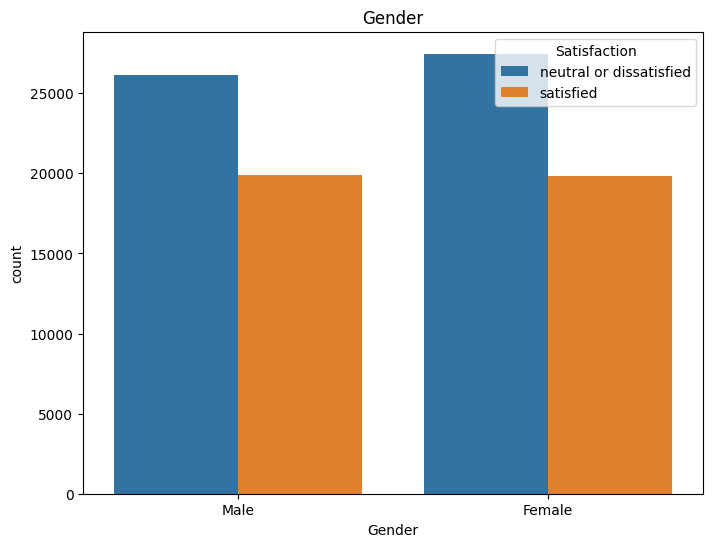

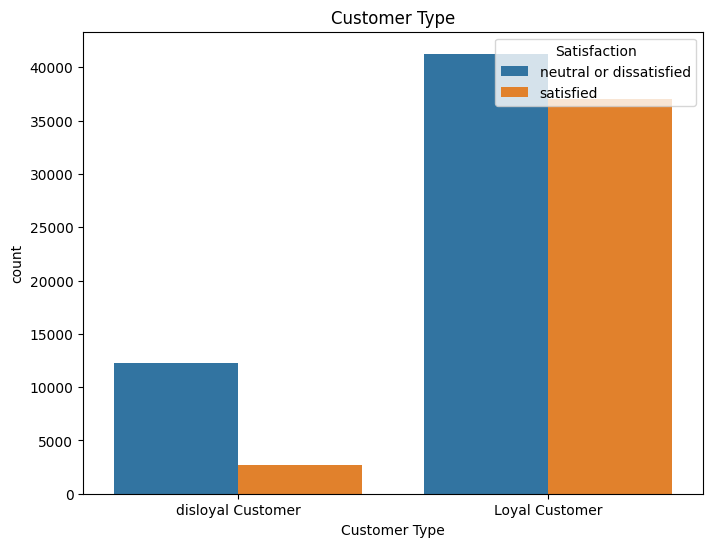

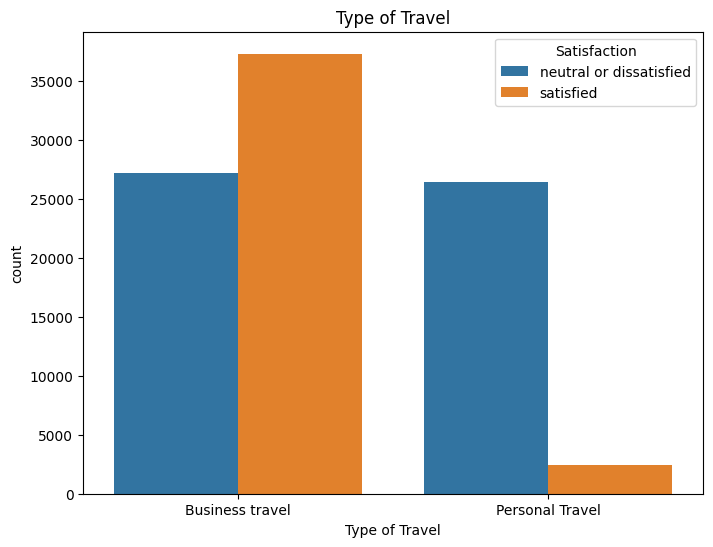

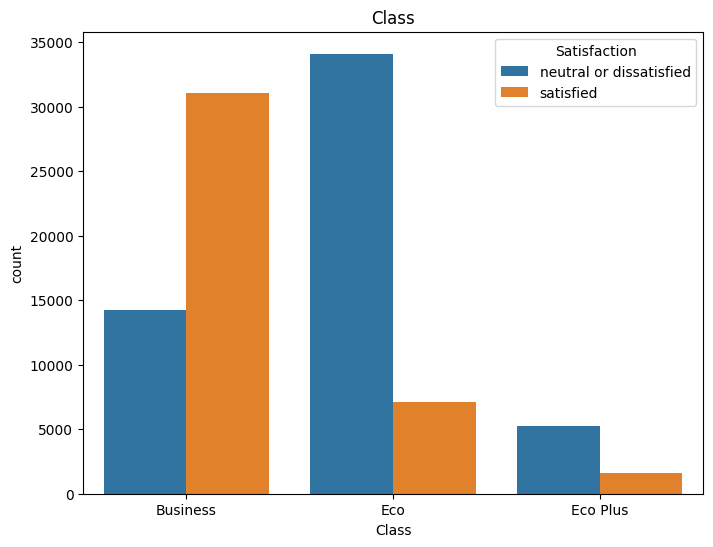

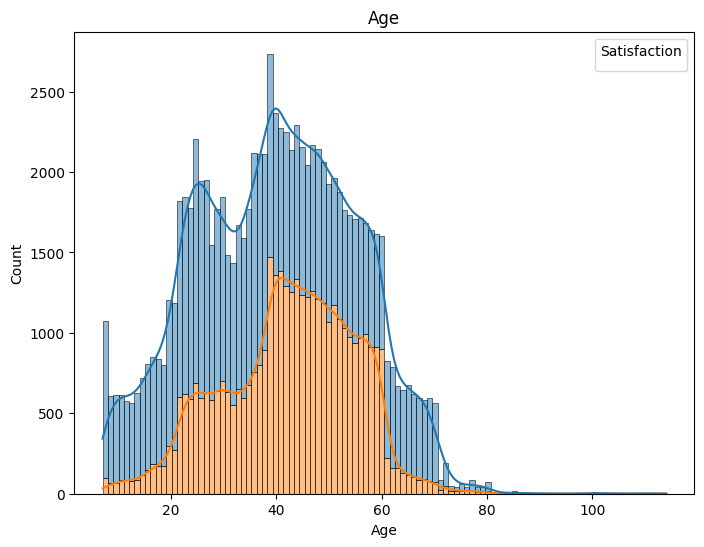

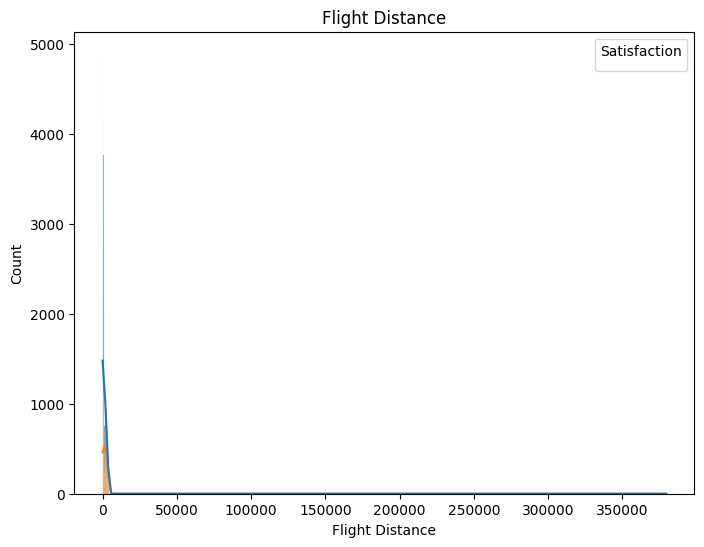

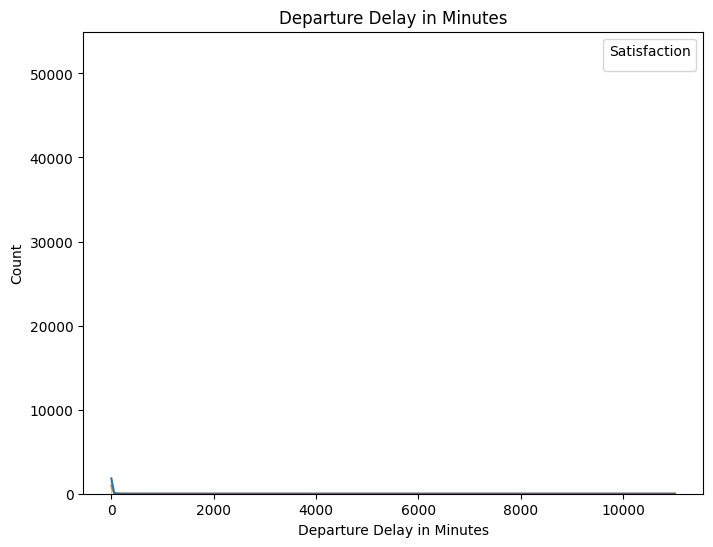

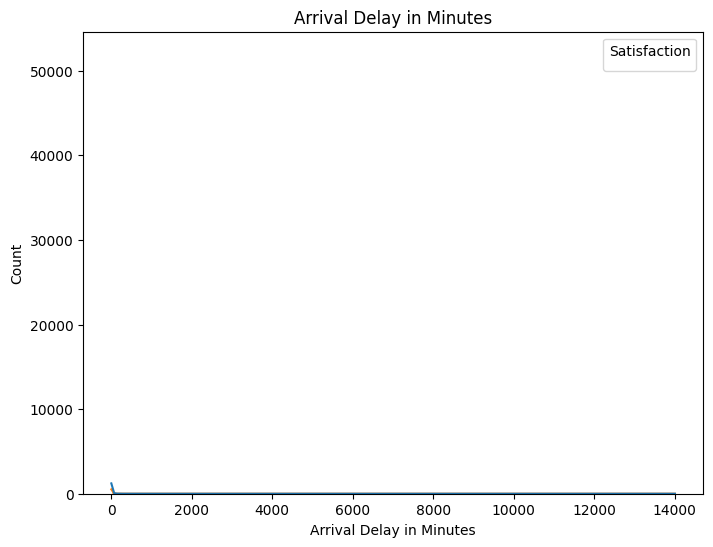

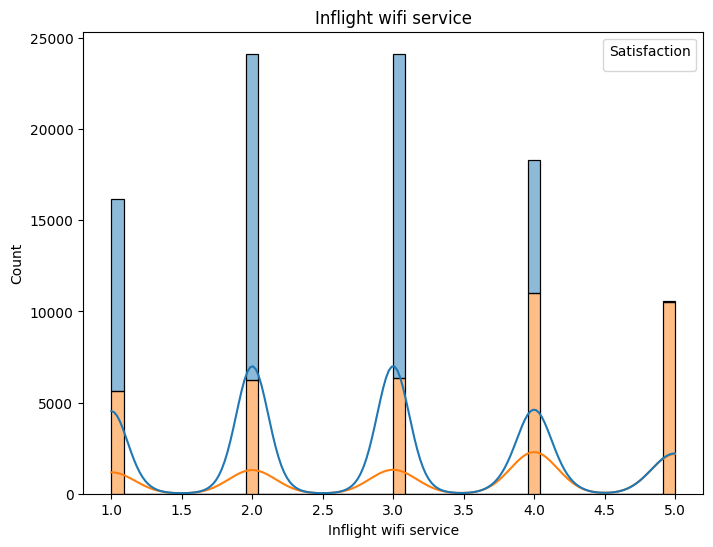

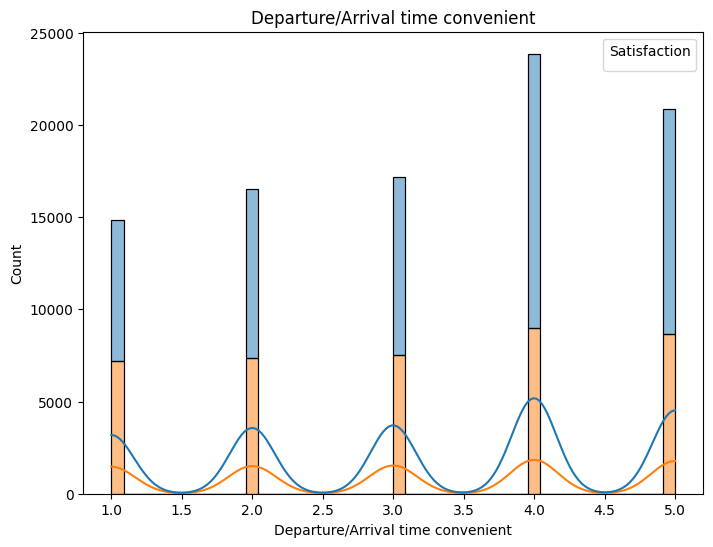

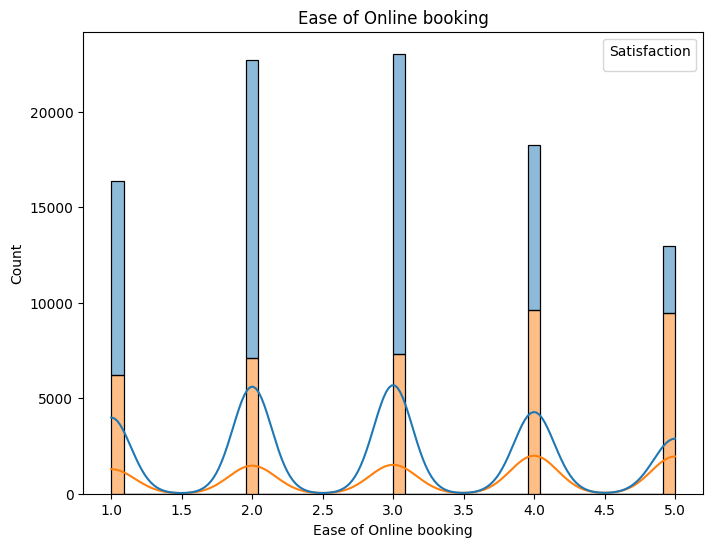

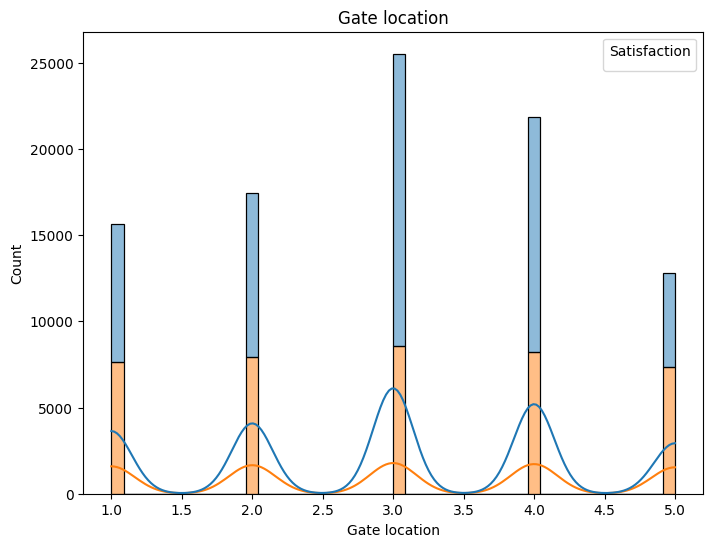

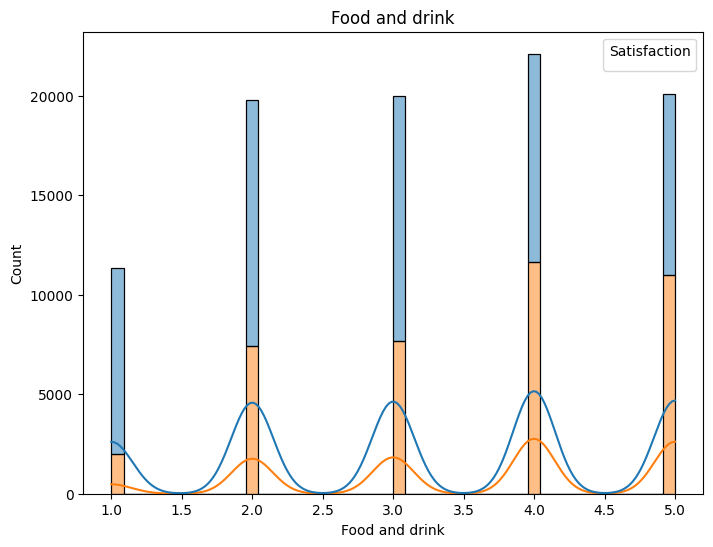

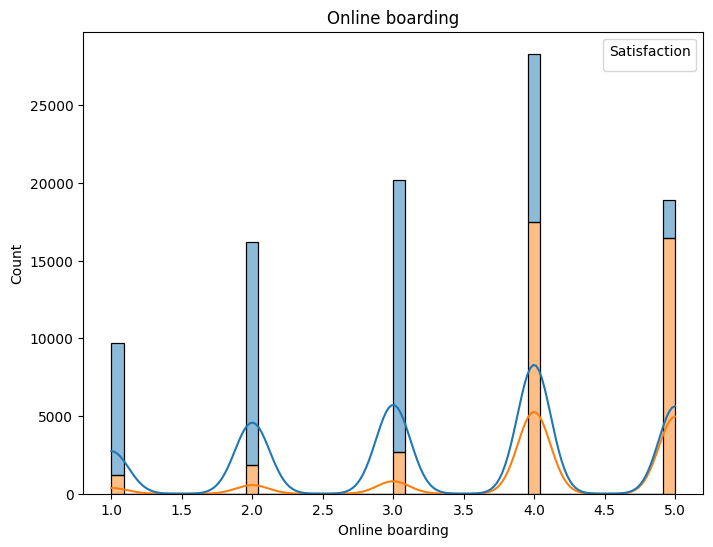

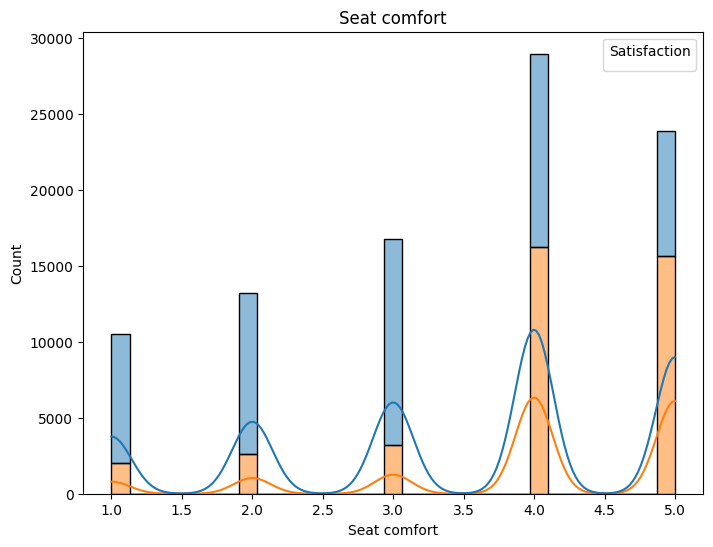

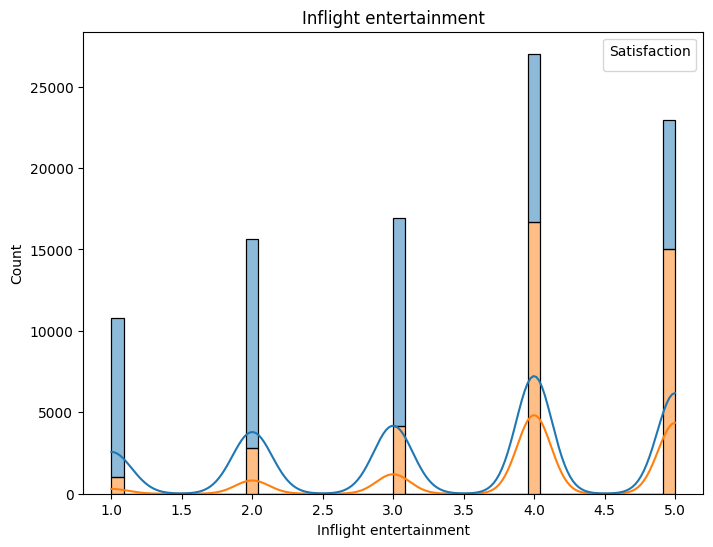

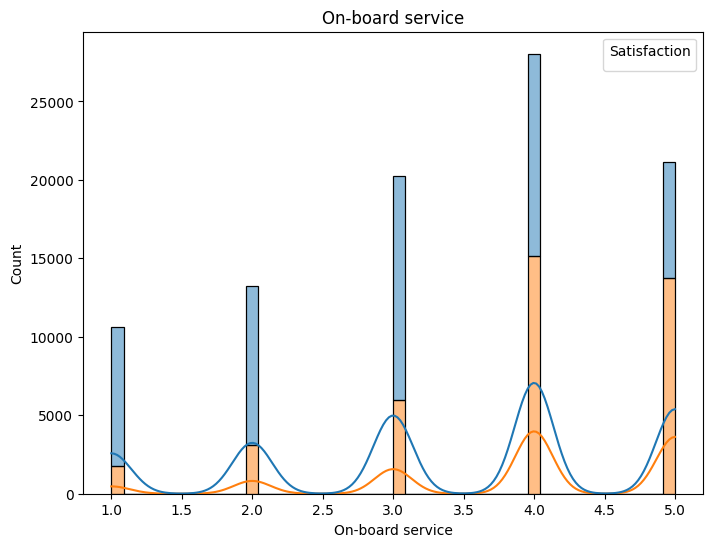

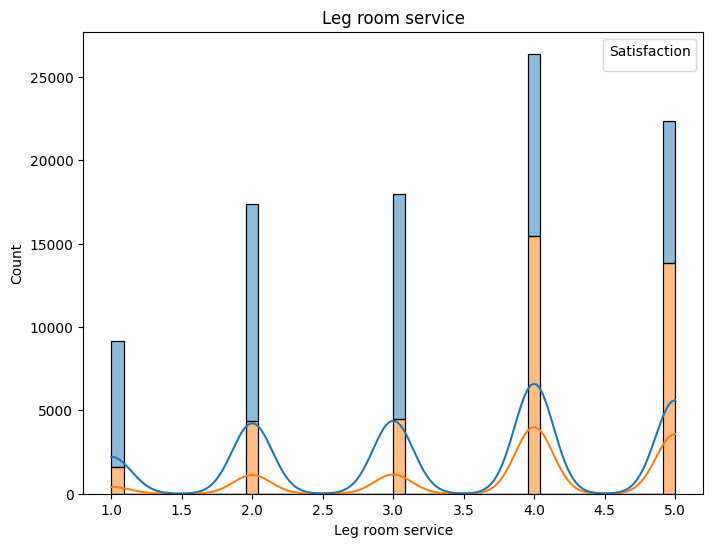

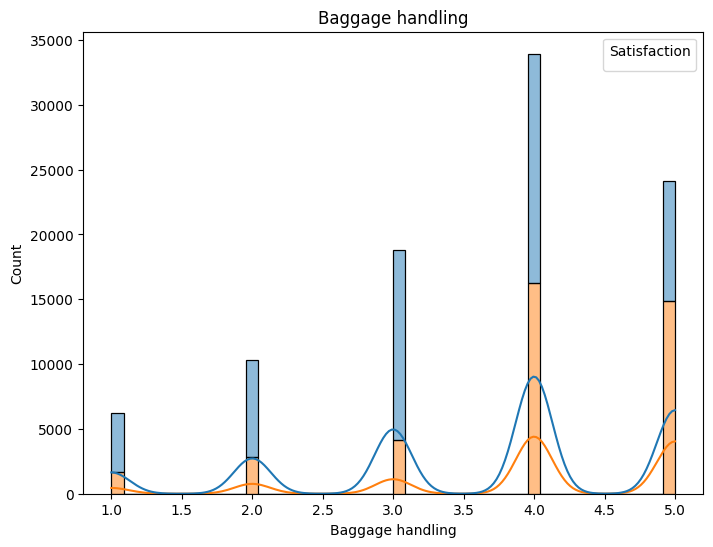

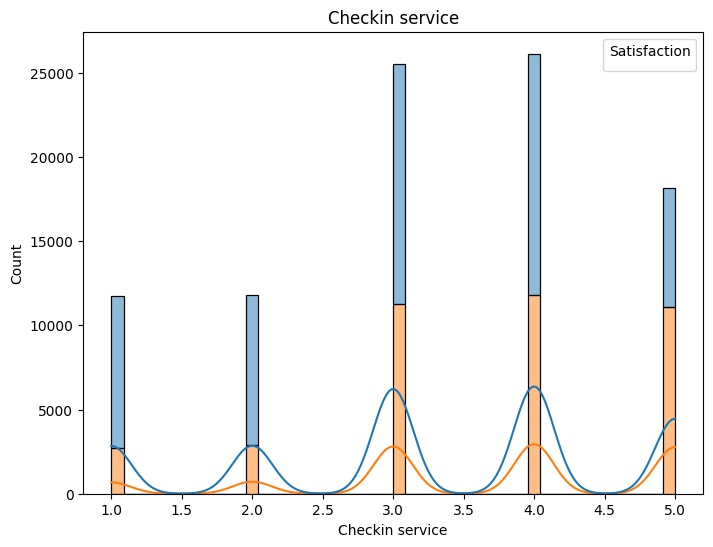

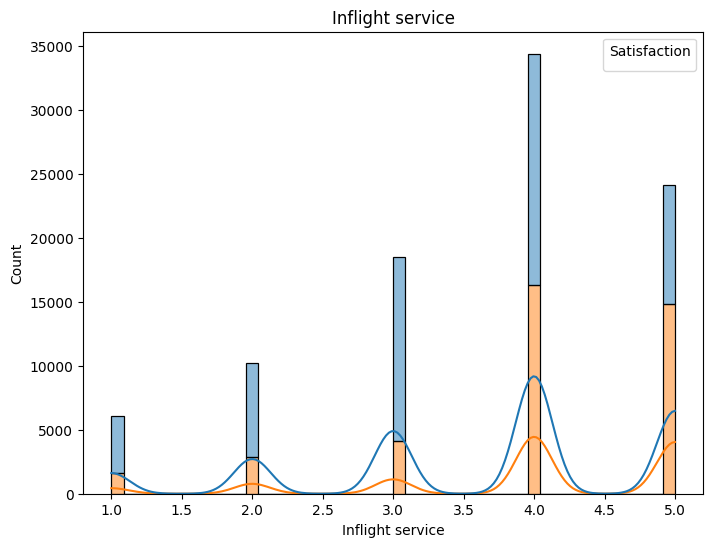

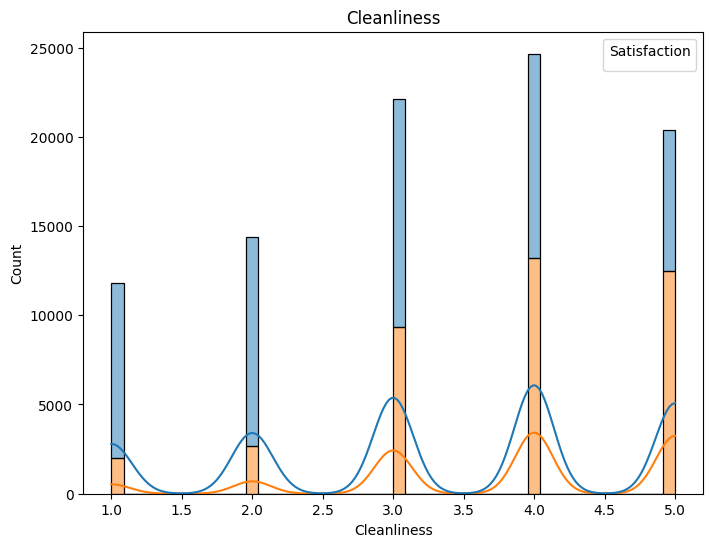

In [30]:
# Отбор признаков, кроме целевой переменной
features = df.columns.drop('satisfaction')

# Определение типов признаков
cat_features = [col for col in features if df[col].dtype == 'object']
num_features = [col for col in features if df[col].dtype != 'object']

# Построение графиков для категориальных признаков
for feature in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue="satisfaction", data=df)
    plt.title(feature)
    plt.legend(title="Satisfaction", loc='upper right')

# Построение графиков для числовых признаков
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue="satisfaction", kde=True, multiple="stack")
    plt.title(feature)
    plt.legend(title="Satisfaction", loc='upper right')

Можем заметить, что для пола пассажира, а также для удобства времени отправления/прибытия получаем распределение удовлетворенности примерно одинаковое для обоих признаков, что указывает на слабую корреляцию с целью, и поэтому мы можем удалить их из датасета.

In [31]:
cols_to_drop = ['Gender', 'Departure/Arrival time convenient']
df = df.drop(cols_to_drop, axis=1)

**Тепловая карта корреляции**

<ipython-input-32-d1dbea912407>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

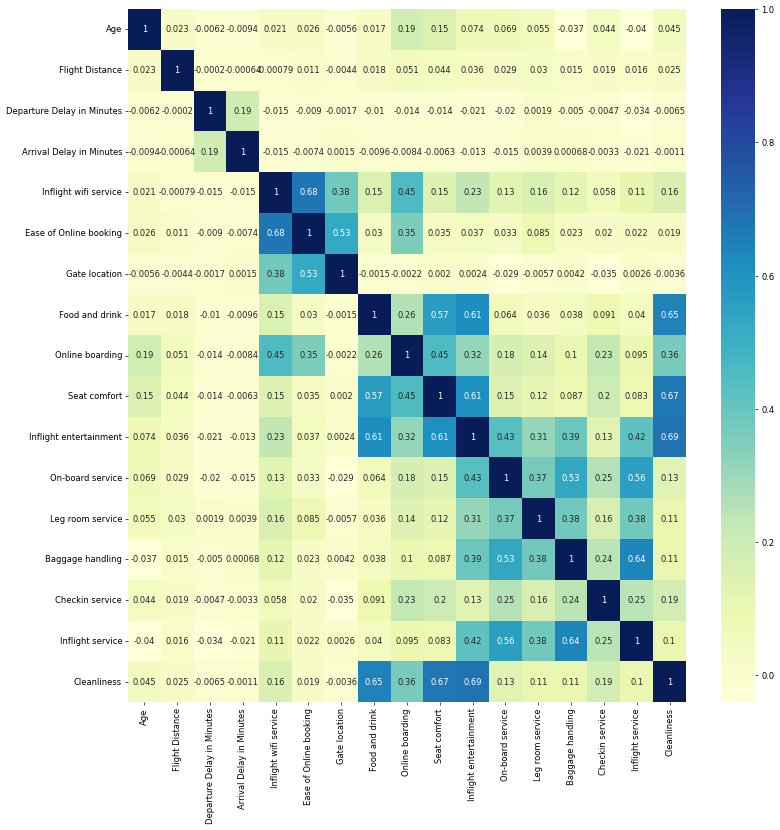

In [32]:
corr_matrix = df.corr()
plt.figure(figsize=(15,15), dpi=60)
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

Характеристики "Задержка прибытия" и "Расположение выхода" имеют низкую корреляцию с целевым показателем - 0,15 и ниже. Отбросим их

In [33]:
cols_to_drop = ['Arrival Delay in Minutes', 'Gate location']
df = df.drop(cols_to_drop, axis=1)

### Подготовка данных

Чтобы применять классические модели машинного обучения, необходимо перевести категориальные (не являющиеся числами и не ведущие себя как числа) признаки в числовые.

In [34]:
target_dict = {'neutral or dissatisfied':0,
               'satisfied':1}
df['satisfaction']=df['satisfaction'].map(target_dict)

In [35]:
label={}
for col in df.select_dtypes(include=['object']).columns:
  label[col] = LabelEncoder()
  df[col] = label[col].fit_transform(df[col])

In [36]:
df.head()

,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,48.0,1,0,0,821.0,2.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0
1,35.0,0,0,0,821.0,26.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,1
2,41.0,0,0,0,853.0,0.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,1
3,50.0,0,0,0,1905.0,0.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,1
4,49.0,0,0,0,3470.0,0.0,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1


## Машинное обучение

Цель: попробуем по признакам предсказать, останется ли пассажир удовлетворенным полетом

In [37]:
X = df.drop(['satisfaction'], axis=1)

y = df['satisfaction'] # целевая переменная (target)

In [38]:
X.head()

,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,48.0,1,0,0,821.0,2.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0
1,35.0,0,0,0,821.0,26.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
2,41.0,0,0,0,853.0,0.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0
3,50.0,0,0,0,1905.0,0.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0
4,49.0,0,0,0,3470.0,0.0,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.3, random_state = RANDOM_STATE)

Стандартизация данных

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Подбор гиперпараметров для модели логистической регрессии (LogisticRegression) на основе сетки (GridSearchCV).

In [41]:
logistic_para={
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty':['l2'],
    'random_state':[0],
    'max_iter':list(range(100,800,100))}

log = LogisticRegression()
grid = GridSearchCV(log, param_grid=logistic_para, cv = 3, scoring='accuracy')
model_grid = grid.fit(X_train, y_train)

print('Лучшие гиперпараметры: '+str(model_grid.best_params_))
print('Лучший результат: '+str(model_grid.best_score_))

Лучшие гиперпараметры: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'random_state': 0}
Лучший результат: 0.8950535066366602


Оценка на тестовой выборке

In [42]:
y_pred = model_grid.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8956242186104661


In [43]:
best_params = model_grid.best_params_
best_score = model_grid.best_score_

best_model = LogisticRegression(**best_params)

best_model.fit(X_train, y_train)

accuracy = best_model.score(X_test, y_test)

In [44]:
print(accuracy)

0.8956242186104661


In [45]:
confusion_matrix(y_test, y_pred)

array([[14687,  1391],
       [ 1531, 10386]])

Это означает, что на тестовой выборке было 14687 объектов класса 0, которые были правильно классифицированы (true negatives), 1391 объект класса 0, которые были неправильно классифицированы (false positives), 1531 объект класса 1, которые были неправильно классифицированы (false negatives) и 10386 объектов класса 1, которые были правильно классифицированы (true positives).

В нашей задаче нам интересно найти как можно больше пассажиров, которым полет не понравился или они отнеслись к нему нейтрально (класс 0), чтобы авиакомпания смогла внести изменения в свою работу.

In [46]:
recall_0 = 14687 / (14687 + 1391)

In [47]:
recall_0

0.9134842642119667

Высокое значение recall_0 означает, что алгоритм находит большое количество объектов класса 0, что является важным для нашей задачи.

In [48]:
precision_0 = 14687 / (14687 + 1531)
f1score_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0)

In [49]:
f1score_0

0.9095243993064157

Высокое значение f1score_0 означает, что алгоритм хорошо обнаруживает объекты класса 0 и при этом уменьшает количество ложно-положительных предсказаний.

##Сохранение модели

In [50]:
with open('model.pickle', 'wb') as f:
    pickle.dump(best_model, f)